# Исследование данных о российском кинопрокате

Заказчик — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Рассмотрим подробнее фильмы, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Данные опубликованы на портале Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Открыть файлы с данными и объединить их в один датафрейм. 

Объединю данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
movies.info()
print('---------------------------------------')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puN

Тип данных столбце `puNumber` не совпадает, возможно из-за нечисловых значений, проверим.

In [4]:
# movies['puNumber'].sort_values() # Посмотрим какие значения лишние
# len(movies.query('puNumber == "нет"')) # Одно значени "нет" в столбце, заменим его на 0

movies['puNumber'] = movies['puNumber'].str.replace('нет', '0')

In [5]:
# Заменим тип данных
movies['puNumber'] = movies['puNumber'].astype('int32')
shows['puNumber'] = shows['puNumber'].astype('int32')

In [6]:
# Объединим таблицы
df = movies.merge(shows, on = 'puNumber', how = 'left')

In [7]:
df.sample(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5408,2рас: Легенда,121014117,2017-07-27T12:00:00.000Z,Художественный,"Морган Крик Продакшнз, Програм Пикчерз, Вольта...",США,Б. Бум,"Л. Хаттон, В. Моррис, Д. Робинсон, Д. Робинсон",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,19500775.00
1033,Монстры на острове,124000413,2013-02-21T12:00:00.000Z,Анимационный,"Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...",Япония - Канада,Такаши Ямадзаки,Генки Хавамура,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мультфильм,фэнтези,приключения",3780.00
1702,Скромный прием,121030113,2013-11-21T12:00:00.000Z,Художественный,"Хуберт Балс Фанд, Ираниан Индепендент",Иран,Мани Хагиги,Мани Хагиги,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,комедия",NaN
7162,Опасные секреты,121023719,2019-09-05T12:00:00.000Z,Художественный,"иУан, Джи-Эс Медиа, Скрин Йоркшир, Классифайд ...","Великобритания, США",Гэвин Худ,"Гед Доэрти, Элизабет Фоулер, Мелисса Шийю-Зу",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"триллер,драма,мелодрама",5956132.53
1352,Электро Москва,126004613,2013-11-21T12:00:00.000Z,Прочие,Ротор Филм,Австрия,"Елена Тихонова, Доминик Шпритцендорфер",Доминик Шпритцендорфер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,документальный,NaN
3660,Служанка (2016),121021916,2016-07-27T12:00:00.000Z,Художественный,"Мохо Фильм, Йонг Фильм",Южная Корея,Чхан Ук Пак,"Чхан Ук Пак, Сид Лим",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.5,"мелодрама,триллер,история",11998709.88
4220,Жить.,111008110,2010-08-30T12:00:00.000Z,Художественный,"ООО ""ТПО ""РОК""",Россия,Ю.Быков,А.Учитель,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,драма,250.00
213,Одержимость,221073214,2014-12-29T12:00:00.000Z,Художественный,"Лэйкшор Интертейнмент, Метро Голдвин Майер",США,Пол МакГиган,"Андрэ Ламаль, Маркус Висиди",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.3,"драма,музыка",NaN
326,Частная жизнь_,111021914,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Райзман,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.7,"драма,комедия",370.00
2902,Ловушка для привидения,121009116,2016-04-19T12:00:00.000Z,Художественный,"Лаки Бёрд Пикчерз, Уорнер Бразерс, Аймер Вейде...",Германия - Австрия - Ирландия,Тоби Бауманн,"Генрих Амброш, Борис Оссере, Оливер Шюндлдер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"фэнтези,комедия,приключения",12982133.68


In [8]:
print(df.size)
df.info(memory_usage='deep')

119776
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int32
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int32(1), object(11)
memory usage: 8.9 MB


In [9]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


**Таблица `df` содержит 16 столбцов:**

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
- `box_office` — сборы в рублях.

**Вывод:**
- Есть пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` посмотреть их количество и разобраться в их появлении; 
- Изменить тип и  формат в столбцах `show_start_date`, `box_office`; 
- В `box_office` минимальное значение равно 0;
- Так же переименовать столбец `puNumber`;
- В `type` проверить категории;
- `age_restriction` Убрать понятные приписки к категориям

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

In [10]:
df['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')

In [11]:
df = df.rename(columns={'puNumber':'pu_number'})

In [12]:
df.head(1)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN


#### Шаг 2.2. Изучить пропуски в датафрейме

In [13]:
# Посмотрим сколько процентов пропусков в таблице 
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

financing_source         95.565055
budget                   95.565055
nonrefundable_support    95.565055
refundable_support       95.565055
box_office               57.814587
genres                   13.037670
ratings                  12.917446
producer                  7.587497
film_studio               0.240449
director                  0.120224
production_country        0.026717
age_restriction           0.000000
type                      0.000000
show_start_date           0.000000
pu_number                 0.000000
title                     0.000000
dtype: float64

**При просмотре данных обнаружила следующие:** 

1. В столбцах: `financing_source`, `nonrefundable_support`, `refundable_support` и `budget` пропусков по 95,5%. Данные в таблице представлены по всем фильмам, которые выходят в прокат в наших кинотеатрах, а данные конкретно в этих столбцах только о спонсированных отечественных фильмах. Соответственно информация по фильмам без господдержки или иностранным фильмам, не указана. Усреднить значения невозможно, поэтому оставлю пропуски как есть. 


2. Пропуски `в ratings` скорее всего вызваны тем, что у фильмов недостаточно оценок что бы сформировать рейтинг, или вовсе отсутствуют оценки зрителей. Т.к столбец не используется в исследовании и пропусков всего 12%, заменю на нетипичное значение '-1'. Считаю, что средним показателем заполнять некорректно.


3. Пропуски `genres`, возможно возникла какая-то ошибка при выгрузке, попытаться определить жанр, можно через столбец `type`. Поскольку случайным значением заполнить нельзя, заполним пропуски 'unknown', так же заполним пропуски в столбцах `director` и `production_country`.


4. Так же столбец `box_office` содержит 57,8% пропусков. Сборы конечно могут зависеть от жанра, бюджета, возрастного ограничения, но это всё не даёт гарантий, что фильм соберёт какую-то определенную сумму, он запросто может собрать в разы больше или меньше. Поэтому и указывать среднее\медианное значение относительно других столбцов будет некорректно т.к. это может исказить реальные данные, потому что процент nan всё же большой. Заменим на 0, в дальнейшем будем использовать данные от единицы.

5. Фильм может выйти без продюсера или без поддержки студии, поэтому заменим пропуски в столбцах `producer` и `film_studio` на 'no'.

In [14]:
# Проверим, в одинаковых сроках пропуски
films = df[(df['financing_source'].isna() == True) & (df['nonrefundable_support'].isna() == True) & (df['refundable_support'].isna() == True) & (df['budget'].isna() == True)]
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 0 to 7485
Data columns (total 16 columns):
title                    7154 non-null object
pu_number                7154 non-null int32
show_start_date          7154 non-null datetime64[ns, UTC]
type                     7154 non-null object
film_studio              7136 non-null object
production_country       7152 non-null object
director                 7145 non-null object
producer                 6588 non-null object
age_restriction          7154 non-null object
refundable_support       0 non-null float64
nonrefundable_support    0 non-null float64
budget                   0 non-null float64
financing_source         0 non-null object
ratings                  6203 non-null object
genres                   6194 non-null object
box_office               2840 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), int32(1), object(10)
memory usage: 922.2+ KB


In [15]:
# Заменим пропуски
df['ratings'] = df['ratings'].fillna(-1)
df.fillna({'genres':'unknown', 'director':'unknown', 'production_country':'unknown'}, inplace=True)
df.fillna({'producer':'no', 'film_studio':'no'}, inplace=True)

In [16]:
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6876,Рига. Дубль 1,126001419,2019-04-26 12:00:00+00:00,Прочие,Зигфрид,Латвия - Франция,Зигфрид,Зигфрид,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,-1,unknown,NaN
4659,P.S. Я люблю тебя /По одноименному произведени...,221156310,2010-12-17 12:00:00+00:00,Художественный,"Элкон Интертейнмент, Гросвенор Парк Продакшн, ...",США,Ричард ЛаГравенезе,"Венди Файнерман, Джеймс Холлонд",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"драма,мелодрама,комедия",NaN
6576,ТАНЯ...,112024918,2019-05-04 12:00:00+00:00,Документальный,"ООО ""Киностудия Крылья""",Россия,П.Мирзоев,"ООО ""Киностудия Крылья""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
3043,Короткометражные фильмы-номинанты на Оскар-2016,126000616,2016-02-24 12:00:00+00:00,Прочие,"Инкогнито Филмз, Флаин Мун Фильмпродакшн, Игл ...",Израиль - Франция - Германия - Палестина - США...,"П.Воллрат, Д.Донахьюм, Б.Клеари, Б.Халил, Г.Ху...","Х.Альберс, Х.Аскотт, П.Воллрат, Х.Доусон, Э.Ду...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,-1,unknown,2552910.0
4078,Формула любви для узников брака,221004010,2010-01-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рилейтивити Медиа, Уайлд Уэ...",США,Питер Биллингсли,"Винс Вон, Скотт Стьюбер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,NaN


In [17]:
len(df.query('box_office == 0'))

24

In [18]:
df['box_office'] = df['box_office'].fillna(0)
df['box_office'] = df['box_office'].astype(int)

In [19]:
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

financing_source         95.565055
budget                   95.565055
nonrefundable_support    95.565055
refundable_support       95.565055
box_office                0.000000
genres                    0.000000
ratings                   0.000000
age_restriction           0.000000
producer                  0.000000
director                  0.000000
production_country        0.000000
film_studio               0.000000
type                      0.000000
show_start_date           0.000000
pu_number                 0.000000
title                     0.000000
dtype: float64

#### Шаг 2.3. Изучить дубликаты в датафрейме

In [20]:
df.duplicated().sum()

0

Дублей нет в таблице. Проверю столбец, все значения которого должны быть уникальны - `pu_number`

In [21]:
df['pu_number'].duplicated().sum()

2

In [22]:
df[df['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",0
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",0


#### Шаг 2.4. Изучить категориальные значения

- Какая общая проблема встречается почти во всех категориальных столбцах;
- Исправить проблемные значения в поле `type`.

Для удобного построения графика в дальнейшем, уберу пояснения к возрастным категориям.

In [23]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [24]:
df['age_restriction'] = df['age_restriction'].str.replace(' - для детей старше 16 лет', '')
df['age_restriction'] = df['age_restriction'].str.replace(' - запрещено для детей', '')
df['age_restriction'] = df['age_restriction'].str.replace(' - для детей старше 12 лет', '')
df['age_restriction'] = df['age_restriction'].str.replace(' - для любой зрительской аудитории', '')
df['age_restriction'] = df['age_restriction'].str.replace(' - для детей старше 6 лет', '')
df['age_restriction'].value_counts()

«16+»    2851
«18+»    1605
«12+»    1593
«0+»      811
«6+»      626
Name: age_restriction, dtype: int64

Есть пробелы в названиях, удалю их.

In [25]:
df['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [26]:
df['type'] = df['type'].str.replace(' Художественный', 'Художественный')
df['type'] = df['type'].str.replace(' Анимационный', 'Анимационный')
df['type'] = df['type'].str.lower()
df['type'].value_counts()

художественный                5909
анимационный                   829
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: type, dtype: int64

При просмотре уникальных значений в `ratings` обнаружила оценки, которые не переведенные в 10-бальную систему рейтинга, сделаем это.

In [27]:
df['ratings'].unique().tolist()

['7.2',
 '6.6',
 '6.8',
 '7.7',
 '8.3',
 '8.0',
 '7.8',
 '8.1',
 '7.1',
 '6.0',
 '7.4',
 '5.8',
 '8.7',
 '6.3',
 '6.9',
 '5.0',
 '4.3',
 '7.3',
 '7.0',
 '6.4',
 -1,
 '8.2',
 '7.5',
 '6.7',
 '7.9',
 '5.9',
 '6.2',
 '5.6',
 '6.5',
 '2.4',
 '7.6',
 '6.1',
 '8.6',
 '8.5',
 '8.8',
 '5.5',
 '5.1',
 '5.7',
 '5.4',
 '99%',
 '4.4',
 '4.5',
 '5.3',
 '4.1',
 '8.4',
 '2.6',
 '3.8',
 '4.6',
 '4.8',
 '4.0',
 '3.0',
 '1.6',
 '4.2',
 '5.2',
 '4.7',
 '4.9',
 '3.9',
 '2.7',
 '3.3',
 '2.9',
 '28%',
 '3.7',
 '1.4',
 '3.1',
 '97%',
 '3.5',
 '3.2',
 '2.8',
 '1.5',
 '2.1',
 '2.5',
 '9.2',
 '3.4',
 '1.1',
 '3.6',
 '83%',
 '64%',
 '91%',
 '94%',
 '62%',
 '79%',
 '90%',
 '19%',
 '88%',
 '1.0',
 '89%',
 '1.3',
 '1.9',
 '1.8',
 '1.2',
 '1.7',
 '9.0',
 '98%',
 '8.9',
 '9.1']

In [28]:
df['ratings'] = df['ratings'].fillna(0)
df['ratings'] = df['ratings'].str.replace('%', '')
df['ratings'] = df['ratings'].astype('float')

In [29]:
# Разделим значения больше 10, на 10, что бы получить 10-бальную систему
df.loc[df['ratings']>=10, 'ratings'] = df['ratings']/10
df.sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1105,Париж-Манхэттен,121014416,2016-05-30 12:00:00+00:00,художественный,"Вандом Продюксьон, Франс 2 Синема, Канал +, Па...",Франция,Софи Леллуш,"Этьен Комар, Филипп Руссле",«16+»,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",0
5252,Тайный знак-,121005211,2011-04-05 12:00:00+00:00,художественный,Киммел Интернэшнл,США,Мэрлин Агрело,"Майкл Эллис, Памела Фальк, Линетт Хауэлл",«16+»,NaN,NaN,NaN,NaN,7.4,"мелодрама,детектив",0
595,Игра--,121006812,2012-03-20 12:00:00+00:00,художественный,Сосьетэ Паризьен де продюксьон,Швеция-Франция-Дания,Рубен Остлунд,"Эрик Хеммендорф, Джессика Аск, Филипп Бобер",«16+»,NaN,NaN,NaN,NaN,8.2,"триллер,драма,детектив",0
7088,Мышеловка. 4Х4,121019919,2019-07-18 12:00:00+00:00,художественный,"Медиапро, Телевисьон Абьерта",Аргентина - Испания,Мариано Кон,Гастон Дюпра,«16+»,NaN,NaN,NaN,NaN,5.6,"фантастика,боевик,триллер",3203581
3334,Фантастические твари и где они обитают,121029216,2016-10-31 12:00:00+00:00,художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Стивен Кловз, Дж. К. Роулинг, Дэвид Хэйман",«12+»,NaN,NaN,NaN,NaN,7.6,"фэнтези,приключения,семейный",1398264684
4314,WINX Club 3D: Волшебное приключение,124001510,2010-10-15 12:00:00+00:00,анимационный,Рэйнбоу СиДжиАй,Италия,Инжинио Страффи,"Инжинио Страффи, Франческо Мастрофини, Джоэнн Ли",«12+»,NaN,NaN,NaN,NaN,3.8,мультфильм,0
3672,Сборник романтических комедий - 2,126000717,2017-06-05 12:00:00+00:00,прочие,"Китчен Корпорейшн, Лагенс де Курт Метраж, Магн...",Испания - Франция - США - Великобритания - Бел...,"С.Абрахамс, Ф.Гарсиа-Руис, Р.Лиментани, Т.Рози...","С.Абрахамс, М.И.Апштейн, А.О.Арангурен, Ф.Бро...",«18+»,NaN,NaN,NaN,NaN,NaN,unknown,1915621
2072,Сказка о потерянном времени_,111013114,2014-10-01 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,no,«0+»,NaN,NaN,NaN,NaN,7.8,"фэнтези,комедия,семейный",13190
4666,Остров .,221163910,2010-12-17 12:00:00+00:00,художественный,"Дримуоркс Пикчерз, Уорнер Бразерс, Паркис/МакД...",США,Майкл Бэй,"Майкл Бэй, Йан Брайс, Лори МакДоналд, Уолтер Ф...",«12+»,NaN,NaN,NaN,NaN,7.5,"фантастика,боевик,триллер",0
4818,Если свекровь - монстр,221011011,2011-01-21 12:00:00+00:00,художественный,"Эвери Продакшнз, Нью Лайн Синема, Вэндер-Спинк...",США,Роберт Лукетич,"Майкл Флинн, Тоби Эммерих",«16+»,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",0


В таблице так же встречаются фильмы вышедшие в СССР, что никак не может быть связано с самым ранним годом премьеры - 2010. Эти фильмы могут показывать в специализированных кинотеатрах повторно, но по факту дата премьеры состоялась давно, и сборы из-за девальвации никак не указать. Эти данные не подходят для исследования.

In [30]:
len(df.query('production_country == "СССР"'))

347

In [31]:
df = df.drop(df[df['production_country'] == 'СССР'].index)
len(df)

7139

#### Шаг 2.5. Проверить количественные значения

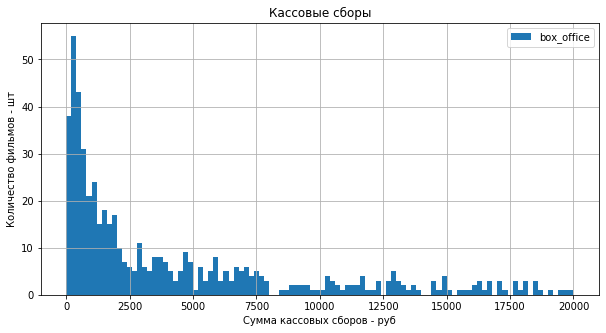

In [32]:
df.plot(y = 'box_office', kind = 'hist',grid = True, figsize = (10,5), bins = 100, range = (1,20000))
plt.title('Кассовые сборы')
plt.xlabel('Сумма кассовых сборов - руб')
plt.ylabel('Количество фильмов - шт')
plt.show()

На графике виден пик фильмов со сборами от 0 до 25 000 руб, заменю эти данные медианным значением. Сборы меньше 500 000 - 1 000 000 руб вообще не кажутся реалистичными, но я выберу данный промежуток, т.к. он особо выделяется на графике.

In [33]:
box_office_median = df['box_office'].median()
df.loc[(df['box_office'] >= 1) & (df['box_office'] <= 25000), 'box_office'] = box_office_median

In [34]:
df['box_office'].value_counts()

0.0            4637
27780.0           2
25685.0           1
5461209.0         1
548216762.0       1
               ... 
5548199.0         1
397025811.0       1
45905.0           1
472520804.0       1
1957738.0         1
Name: box_office, Length: 2502, dtype: int64

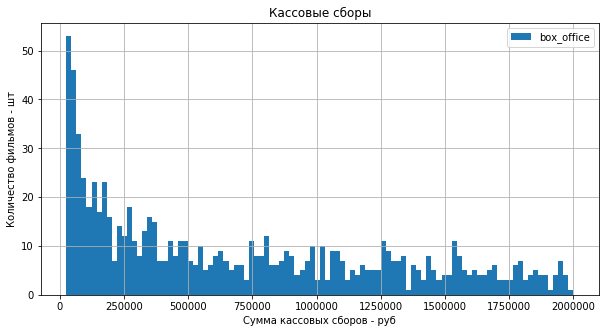

In [35]:
df.query('box_office > 0').plot(y = 'box_office', kind = 'hist',grid = True, figsize = (10,5), bins = 100, range = (25000,2000000))
plt.title('Кассовые сборы')
plt.xlabel('Сумма кассовых сборов - руб')
plt.ylabel('Количество фильмов - шт')
plt.show()

#### Шаг 2.6. Добавить новые столбцы

- Столбец с информацией о годе проката. Выделить год из даты премьеры фильма.

In [36]:
df['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')

In [37]:
df['year_publication'] = df['show_start_date'].dt.year
df['show_start_date'] = df['show_start_date'].dt.date

- Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [38]:
df['first_genre'] = df['genres'].str.split(',', expand=True)[0]
df['first_director'] = df['director'].str.split(',', expand=True)[0]

- Какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
df['part_state_support'] = (df['refundable_support']+df['nonrefundable_support'])

In [40]:
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_publication,first_genre,first_director,part_state_support
3334,Фантастические твари и где они обитают,121029216,2016-10-31,художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Стивен Кловз, Дж. К. Роулинг, Дэвид Хэйман",«12+»,NaN,NaN,NaN,NaN,7.6,"фэнтези,приключения,семейный",1.398265e+09,2016,фэнтези,Дэвид Йейтс,NaN
5999,Каникулы,112002218,2018-08-01,документальный,"ООО ""Мастерская Марины Разбежкиной""",Россия,М.Сергеева,М.Разбежкина,«12+»,NaN,NaN,NaN,NaN,6.5,"комедия,приключения",0.000000e+00,2018,комедия,М.Сергеева,NaN
2742,"Программа короткометражного кино ""Повороты""",121011615,2015-05-27,художественный,"Омбр/Люмьер, Ресентиль, Супер Олрайт Продакшнз...",Великобритания - США - Австралия - Ирландия - ...,"Филипп Амио, Филипп Беллимар, Мартин Брукс, Ди...",no,«12+»,NaN,NaN,NaN,NaN,6.1,"короткометражка,мелодрама",0.000000e+00,2015,короткометражка,Филипп Амио,NaN
2435,Оставленные,121021714,2014-09-25,художественный,Стон Лайк Интертейнмент,США,Вик Армстронг,"Эд Клайдсдэйл, Пол Лалонд, Майкл Уокер",«16+»,NaN,NaN,NaN,NaN,7.8,"фэнтези,драма,детектив",0.000000e+00,2014,фэнтези,Вик Армстронг,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06,документальный,no,Россия,А.Сайфуллина,А.Сайфуллина,«12+»,NaN,NaN,NaN,NaN,NaN,unknown,0.000000e+00,2018,unknown,А.Сайфуллина,NaN


### Шаг 3. Исследовательский анализ данных

- Сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [41]:
year_publication_pivot = df.groupby('year_publication')['year_publication'].count()
year_publication_pivot

year_publication
2010    972
2011    618
2012    593
2013    570
2014    674
2015    649
2016    776
2017    479
2018    891
2019    917
Name: year_publication, dtype: int64

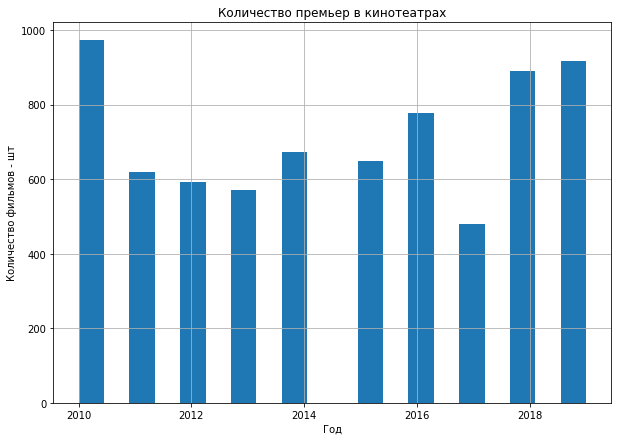

In [42]:
df.hist('year_publication', bins= 20, figsize = (10,7))
plt.title('Количество премьер в кинотеатрах')
plt.xlabel('Год')
plt.ylabel('Количество фильмов - шт')
plt.show()

**Вывод**
1. Больше всего кинопремьер было в 2010 г. - 972 фильма.
2. Меньше всего кинопремьер было в 2017 г. - 480 фильмов.

****

- Как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'Кассовые сборы - млрд.руб')

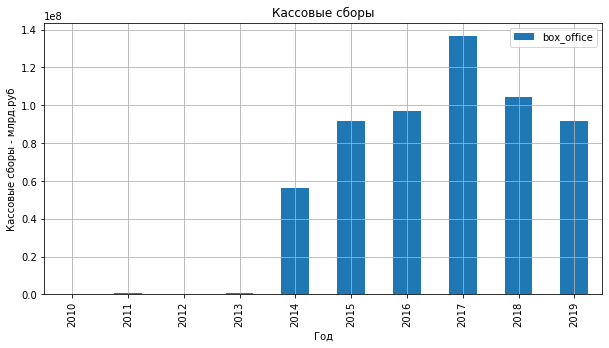

In [43]:
df.query('box_office > 0').pivot_table(index='year_publication', values='box_office').plot(kind='bar', grid=True, style='o-', figsize=(10, 5))
plt.title('Кассовые сборы')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы - млрд.руб')

**Вывод**

С 2014 г наблюдается рост по кассовым сборам, возможно это связано, экономическим кризисом и общим повышением цен в этом и последующих годах.
1. Максимальные сборы были в 2017г - 1.4 млрд. руб
2. Минимальные сборы в 2010/2012гг -  не больше 1 млн руб

****

- С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.

In [44]:
df.query('box_office > 0').pivot_table(index='year_publication', values='box_office', aggfunc={'median','mean'})

,mean,median
year_publication,,
2010,2.323557e+05,45225.0
2011,8.080731e+05,58890.0
2012,2.224391e+05,62200.0
2013,9.354135e+05,107750.0
2014,5.639533e+07,662939.0
2015,9.164010e+07,7099294.0
2016,9.669921e+07,4839381.0
2017,1.367991e+08,10387327.0
2018,1.045651e+08,8891102.0


****

- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Text(0, 0.5, 'Кассовые сборы - млрд.руб')

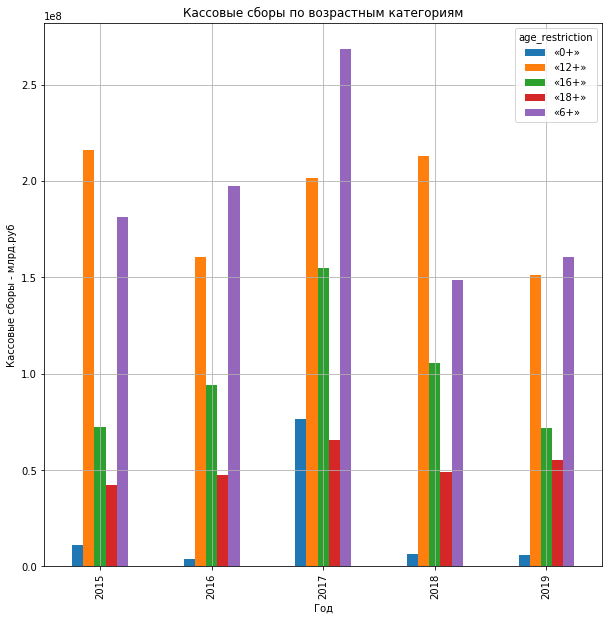

In [45]:
df.query('2015 <= year_publication <= 2019').query('box_office > 0').pivot_table(index=['year_publication'],columns = ['age_restriction'], values='box_office').plot(kind='bar', grid=True, figsize=(10, 10))
plt.title('Кассовые сборы по возрастным категориям')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы - млрд.руб')

In [46]:
df.query('box_office > 0').query('2015 <= year_publication <= 2019').pivot_table(columns = ['age_restriction'], values='box_office',aggfunc={'median','mean'}).T

,mean,median
age_restriction,,
«0+»,9.866639e+06,3237332.0
«12+»,1.842529e+08,8931965.0
«16+»,9.636830e+07,6131431.0
«18+»,5.212217e+07,6392022.0
«6+»,1.847628e+08,18431677.5


**Вывод**
- Самая прибыльная категория по сборам - 6+ лет, в среднем получается больше, чем у других. 

- В 2017г был пик по сборам у большинства возрастных категорий.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Text(0, 0.5, 'Затраты - млрд.руб')

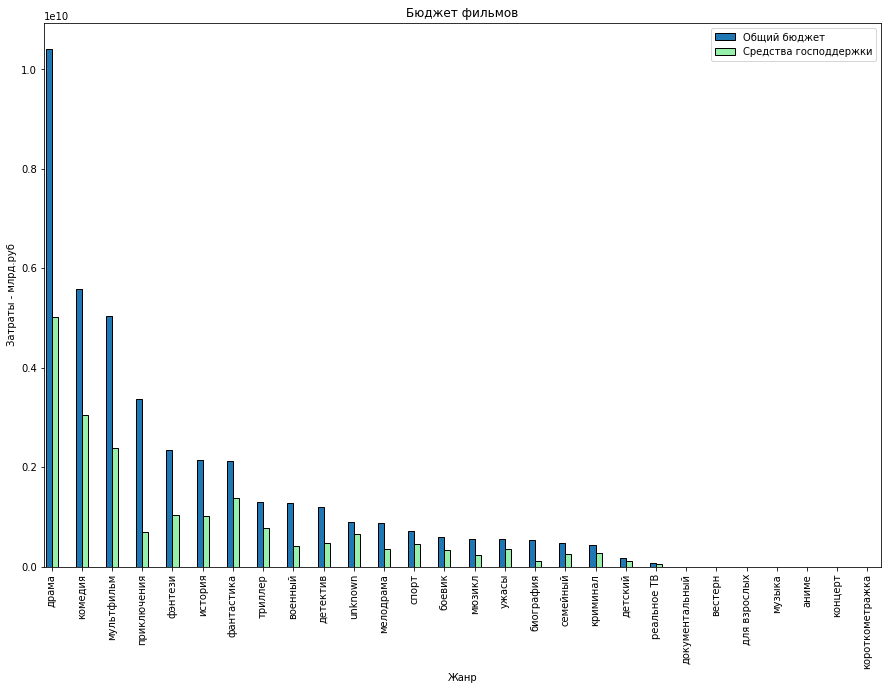

In [47]:
pivot = df.query('2015 <= year_publication <= 2019').groupby('first_genre').agg({'budget': 'sum', 'part_state_support':'sum'}).sort_values(by='budget', ascending=False)
pivot['budget'].plot(kind='bar', figsize=(15,10), ec='black', width=0.2, position=1,legend=True, label='Общий бюджет')
pivot['part_state_support'].plot(kind='bar', figsize=(15,10), ec='black', width=0.2, color='#97F0AA', position=0,legend=True, label='Средства господдержки')
plt.title('Бюджет фильмов')
plt.xlabel('Жанр')
plt.ylabel('Затраты - млрд.руб')

Text(0, 0.5, 'Млрд.руб')

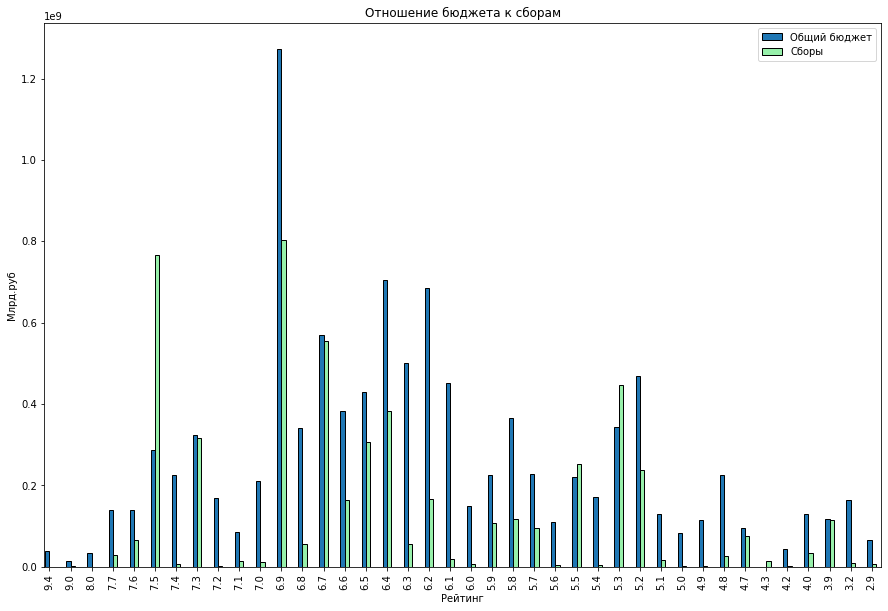

In [48]:
pivot = df.query('financing_source == "Министерство культуры"').query('2015 <= year_publication <= 2019').groupby('ratings').agg({'budget': 'sum', 'box_office':'sum'}).sort_values(by='ratings', ascending=False)
pivot['budget'].plot(kind='bar', figsize=(15,10), ec='black', width=0.2, position=1,legend=True, label='Общий бюджет')
pivot['box_office'].plot(kind='bar', figsize=(15,10), ec='black', width=0.2, color='#97F0AA', position=0, legend=True, label='Сборы')
plt.title('Отношение бюджета к сборам')
plt.xlabel('Рейтинг')
plt.ylabel('Млрд.руб')

**Вывод**

1. В период с 2015 по 2019гг министерство культуры и/или фонд кино больше всего средств выделяли на фильмы в жанрах: 
- драма ≈ 500 млн. руб
- комедия ≈ 300 млн руб
- мультфильмы ≈ 250 млн руб
Остальные жанры спонсировались в равной степени, но получали не больше 100 млн руб

2. Фильмы чаще всего имеют средний рейтинг - от 5,5 до 7,0 баллов. При этом сборы редко превышают общий бюджет. Даже если фильму удалось собрать сумму равную бюджету, это не говорит об окупаемости, т.к. большая часть сборов уйдет кинотеатрам, которые показывали фильм, маркетинг, и т.д. Можно сказать, что большинство фильмов не выходит даже в 0.

### Шаг 5. Общий вывод

Проанализировав более 7000 фильмов выходивших в российский кинопрокат с 2010 по 2019 гг, можно ответить на следующие вопросы:

**Сколько фильмов выходило в прокат каждый год?**
1. Больше всего кинопремьер было в 2010 г. - 972 фильма.
2. Меньше всего кинопремьер было в 2017 г. - 480 фильмов.

**В каком году сумма сборов была минимальной? А максимальной?**
С 2014 г наблюдается рост по кассовым сборам, возможно это связано, экономическим кризисом и общим повышением цен в этом и последующих годах.
1. Максимальные сборы были в 2017г - 1.4 млрд. руб
2. Минимальные сборы в 2010/2012гг -  не больше 1 млн. руб

**Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год?**
1. Самая прибыльная категория по сбрам - 6+ лет, в среднем получается больше, чем у других. 
2. Меньше всего сборов по категории 0+
В 2017г был пик по сборам у большинства возрастных категорий.

**Сколько выделяют средств на фильмы, которые получили государственную поддержку? 
Хорошо ли окупаются такие фильмы, какой у них рейтинг?**
Больше спонсировались фильмы в период с 2015-2019гг жанре:
- драма ≈ 500 млн. руб
- комедия ≈ 300 млн руб
- мультфильмы ≈ 250

Фильмы чаще всего имеют средний рейтинг - от 5,5 до 7,0 баллов. При этом сборы редко превышают общий бюджет, фильмы не окупаются.